In [1]:
import pandas as pd
import altair as alt

df = pd.read_csv("healthcare_dataset_cleaned.csv").head(5000)

bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = [f"{bins[i]}–{bins[i+1]}" for i in range(len(bins)-1)]
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False).astype(str)
df['result_type'] = df['Test Results']

color_map = {'Female': '#bebada', 'Male': '#fdb462'}

agg_df = df.groupby(['age_group', 'Gender']).agg(
    count=('Name', 'count'),
    avg_duration=('Duration of Stay', lambda x: round(x.mean()))
).reset_index()

chart1 = alt.Chart(agg_df).mark_bar().encode(
    x=alt.X('age_group:N', title='Age Group', axis=alt.Axis(labelAngle=0)),
    xOffset='Gender:N',
    y=alt.Y('count:Q', title='Number of Patients'),
    color=alt.Color('Gender:N', scale=alt.Scale(domain=list(color_map.keys()), range=list(color_map.values()))),
    tooltip=['age_group:N', 'Gender:N', 'count:Q', 'avg_duration:Q']
).properties(
    width=700,
    height=400,
    title='Age Distribution by Gender'
)

age_group_select = alt.binding_select(options=labels, name='Select Age Group: ')
age_group_param = alt.param(bind=age_group_select, value=labels[0])

chart2 = alt.Chart(df).mark_bar().encode(
    x=alt.X('Duration of Stay:Q', bin=alt.Bin(maxbins=20), title='Duration of Stay (days)'),
    y=alt.Y('count()', title='Number of Patients', scale = alt.Scale(domain=[0, 90])),
    color=alt.Color('Gender:N', scale=alt.Scale(domain=list(color_map.keys()), range=list(color_map.values()))),
    tooltip=['Gender:N', 'count()']
).transform_filter(
    alt.datum.age_group == age_group_param
).properties(
    width=700,
    height=400,
    title='Duration of Stay Distribution Within Selected Age Group'
).add_params(
    age_group_param
)

final_chart = chart1 & chart2
final_chart.save("bar_plot_interactive.html")

final_chart.show()

alt.VConcatChart(...)

In [2]:
# #installing statsmodel
# %pip install statsmodel

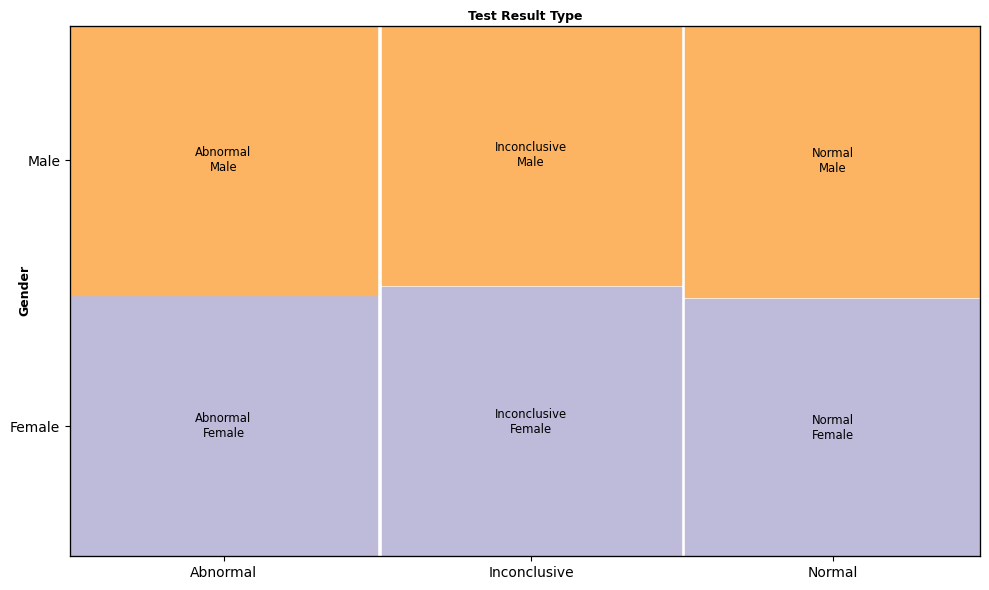

In [3]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import pandas as pd

contingency_table = pd.crosstab(df['Test Results'], df['Gender'])

fig, ax = plt.subplots(figsize=(10, 6))  

color_map = {'Female': '#bebada', 'Male': '#fdb462'}

def props(key):
    return {'color': color_map.get(key[1])}  

mosaic(contingency_table.stack(), ax=ax, properties=props)

plt.xlabel('Test Result Type', fontfamily = 'sans-serif', fontweight = 'bold', fontsize = 9)
ax.text(-0.05, 0.5, 'Gender', rotation=90, ha='center', va='center', transform=ax.transAxes, fontsize=9, fontfamily = 'sans-serif', fontweight = 'bold')

plt.savefig('mosaic_plot.svg', bbox_inches='tight')
plt.tight_layout()
plt.show()